In [18]:
import numpy
x = 2 * numpy.random.rand(100, 1) # 100 x 1 matrix
y = 4 + 3 * x + numpy.random.randn(100, 1)

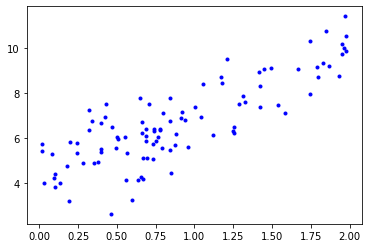

In [38]:
import matplotlib.pyplot as plt

plt.plot(x, y, "b.")
plt.show()

In [19]:
# 100x1 matrix of 1 with 100x1 matrix of x
# (since theta 0 is 1)
x_b = numpy.c_[numpy.ones((100, 1)), x]
# np.linalg -  linear algebra module to use inverse
# dot for matrix multiplication
theta_best = numpy.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [21]:
# linear regression result using Normal Equation
# dervied & solved from MSE
# theta 0 & theta 1
theta_best

array([[4.23612849],
       [2.74505024]])

In [30]:
# guess when x = 0 & x = 2
x_new = numpy.array([[0], [2]])
x_new_b = numpy.c_[numpy.ones((2,1)), x_new] # [[1, 0], [1, 2]]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.23612849],
       [9.72622896]])

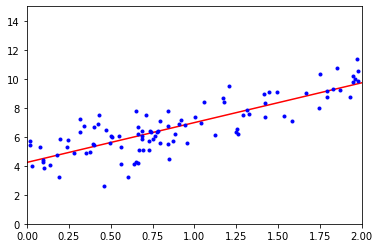

In [45]:
plt.plot(x_new, y_predict, "r-") # red line
plt.plot(x, y, "b.") # black dot
plt.axis([0, 2, 0, 15])
plt.show()

In [48]:
# linear reg using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(x_new)

[4.23612849] [[2.74505024]]


array([[4.23612849],
       [9.72622896]])

In [50]:
# linearRegression is based lstsq (least squares)
theta_best_svd, residuals, rank, s = numpy.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[4.23612849],
       [2.74505024]])

In [52]:
# Can use pinv (pseudoinverse of X) to calculate directly
numpy.linalg.pinv(x_b).dot(y)

# uses standard matrix factorization technique called SVD (singular value decomp)
# LinearRegression -> n^2 using SVD

array([[4.23612849],
       [2.74505024]])

In [54]:
# batch gradient descent algorithm
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = numpy.random.randn(2, 1) # 2x1
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [55]:
theta

array([[4.23612849],
       [2.74505024]])

In [69]:
# stoichastic gradient descent
# epoch  named by convention: # of rounds
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

theta = numpy.random.randn(2,1) # random initialization

#NOTE: x is 2x1 matrix : [1, xi] - for y = theta(0) + theta(1) x(1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = numpy.random.randint(m)
        xi = x_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        # same as prev eq, but 1/m is in eta variable
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m * i)
        theta = theta - eta * gradients

In [70]:
theta

array([[3.96595023],
       [2.89373841]])

In [75]:
# Use Stoichastic GD SDGRegressor
# 1000 epochs or until loss drops by less than 0.001 in an epoch
# eta0 : starting learning rate
# no regularization (penalty=None)
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.26894853]), array([2.83642115]))

In [82]:
# Polynomial Regression

# generate random variables
m = 100
x = 6 * numpy.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + numpy.random.randn(m, 1)

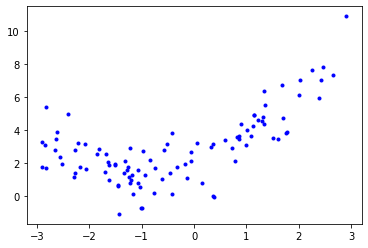

In [81]:
plt.plot(x, y, "b.") # black dot
plt.show()

In [88]:
# Use PolynomialFeatures to transform training data
# adds square (2nd deg pol) to each feature
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])

[-2.74552423]
[-2.74552423  7.53790329]


In [89]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88245321]), array([[0.89708445, 0.57885811]]))

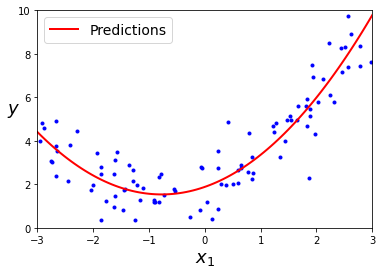

In [94]:

X_new=numpy.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(x, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()